The objective of this exercise is to experiment with another selection method called UCB (Upper-Confidence-Bound) and comapre the results. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#define the policy (upper-confidence-bound)
def UCB(c, action_values, action_count, steps):
    return np.argmax(action_values + c * np.sqrt(np.log(steps)/action_count))

In [3]:
#define the reward function 
def get_reward(action, true_action_value):
    return np.random.normal(true_action_value[action], 1)

In [6]:
def bandit(k, nb_run, steps, c):
  average_rewards = np.zeros(steps)
  optimal_actions = np.zeros(steps)

  for i in range(nb_run): 
    true_action_value = np.random.normal(0, 2, k)
    action_count = np.zeros(k)
    action_values = np.zeros(k) 
    optimal_action = np.argmax(true_action_value)

    for j in range(steps):
      action = UCB(c, action_values, action_count, j)
      reward = get_reward(action, true_action_value)
      
      action_count[action] += 1 
      action_values[action] += (reward - action_values[action]) / action_count[action]

      average_rewards[j] += reward/ nb_run 

      if action == optimal_action: 
        optimal_actions[j] += 1/nb_run

  fig, axs = plt.subplots(1, 2, figsize=(16, 6))
  axs[0].plot(range(steps), average_rewards, label=f"c={c}")
  axs[0].set_title('Average Reward vs. Number of Steps')
  axs[0].set_xlabel('Number of Steps')
  axs[0].set_ylabel('Average Reward')
  axs[0].legend()

  axs[1].plot(range(steps), optimal_actions, label=f"c={c}")
  axs[1].set_title('% Optimal Action vs. Number of Steps')
  axs[1].set_xlabel('Number of Steps')
  axs[1].set_ylabel('% Optimal Action')
  axs[1].legend()

  plt.show()


/var/folders/_8/8ycn4frd6qb6t8bmfm75jq3w0000gn/T/ipykernel_87776/3084240899.py:3: RuntimeWarning: divide by zero encountered in log
  return np.argmax(action_values + c * np.sqrt(np.log(steps)/action_count))
/var/folders/_8/8ycn4frd6qb6t8bmfm75jq3w0000gn/T/ipykernel_87776/3084240899.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.argmax(action_values + c * np.sqrt(np.log(steps)/action_count))
/var/folders/_8/8ycn4frd6qb6t8bmfm75jq3w0000gn/T/ipykernel_87776/3084240899.py:3: RuntimeWarning: invalid value encountered in divide
  return np.argmax(action_values + c * np.sqrt(np.log(steps)/action_count))
/var/folders/_8/8ycn4frd6qb6t8bmfm75jq3w0000gn/T/ipykernel_87776/3084240899.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.argmax(action_values + c * np.sqrt(np.log(steps)/action_count))
/var/folders/_8/8ycn4frd6qb6t8bmfm75jq3w0000gn/T/ipykernel_87776/3084240899.py:3: RuntimeWarning: invalid value encountered in multiply
  return np.argmax(action_v

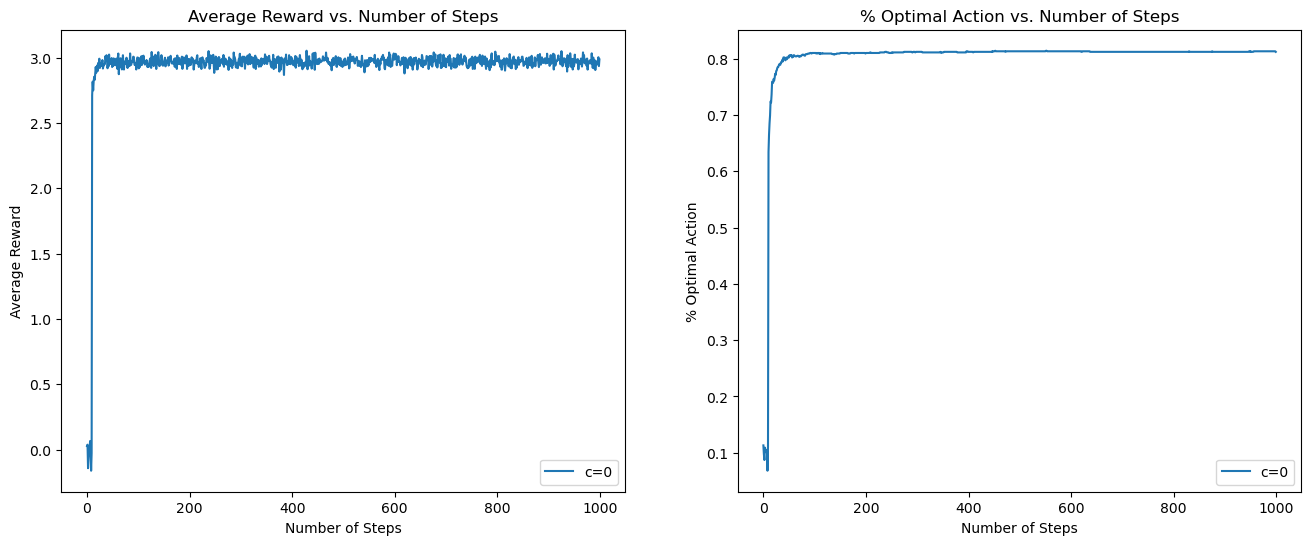

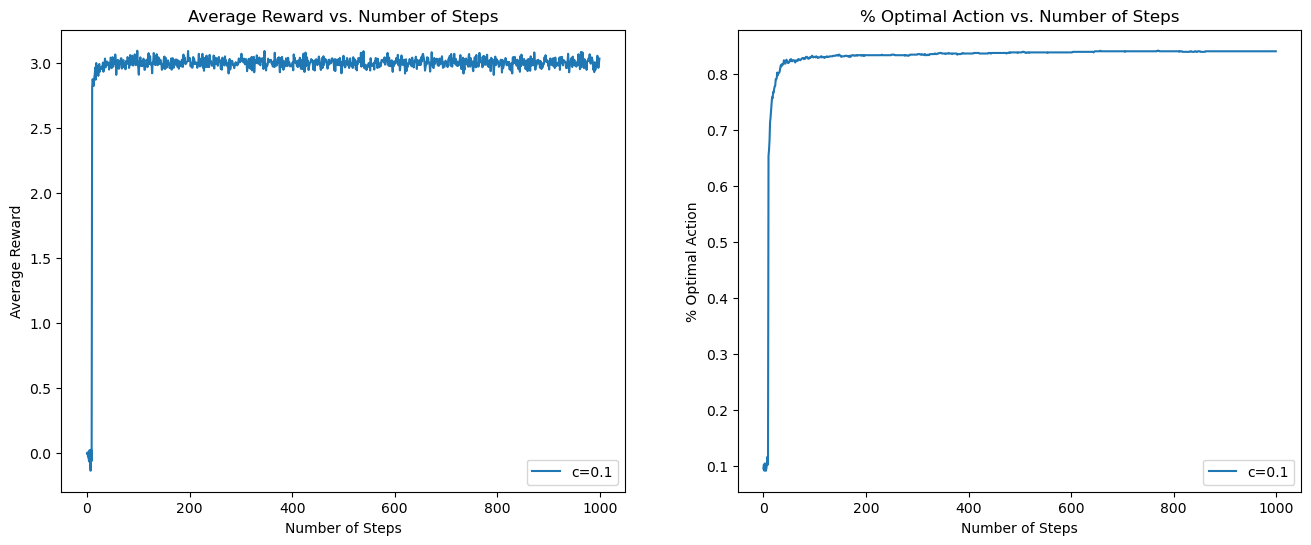

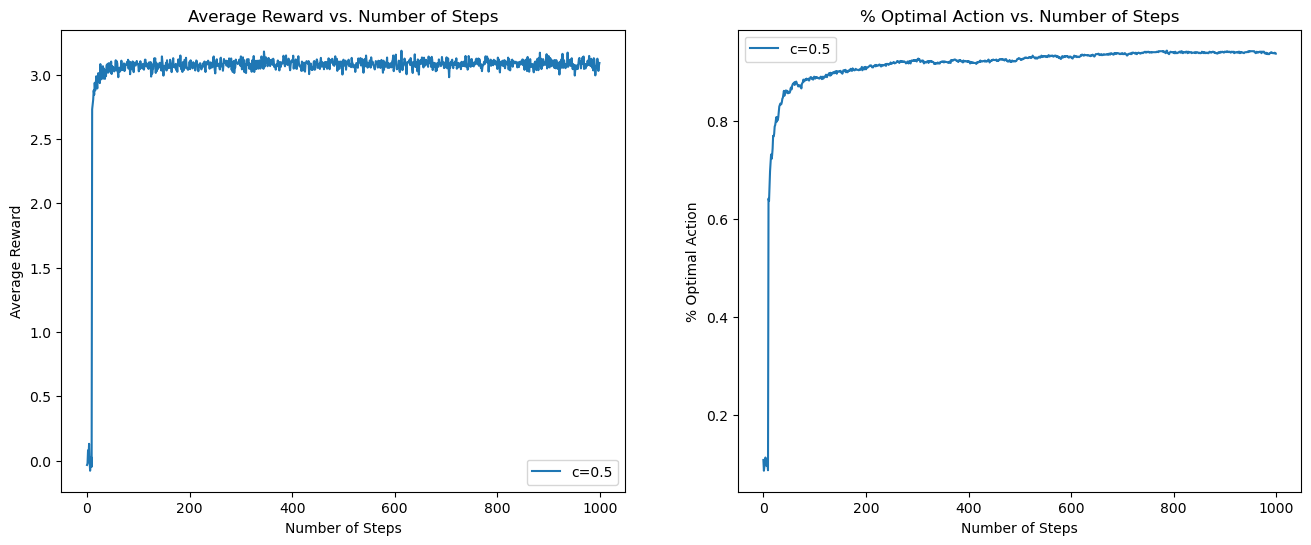

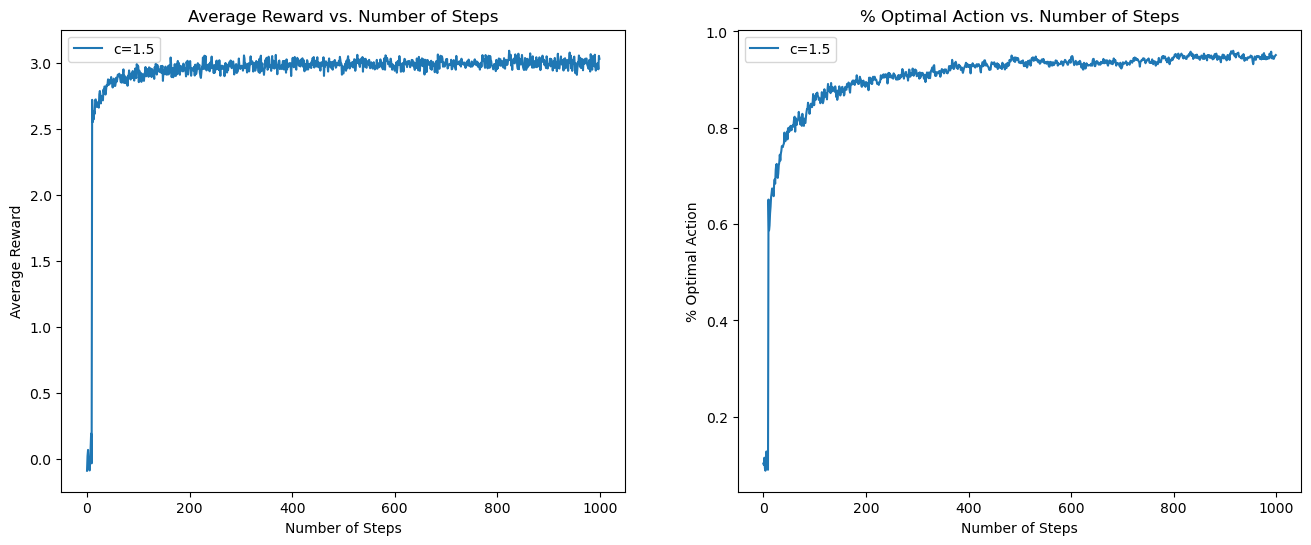

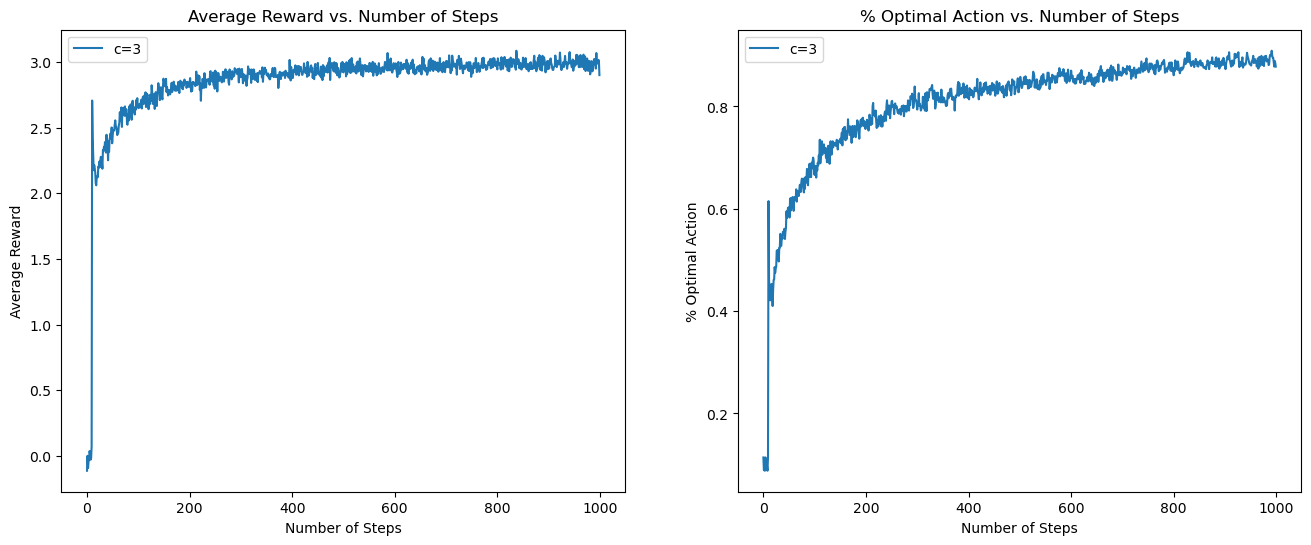

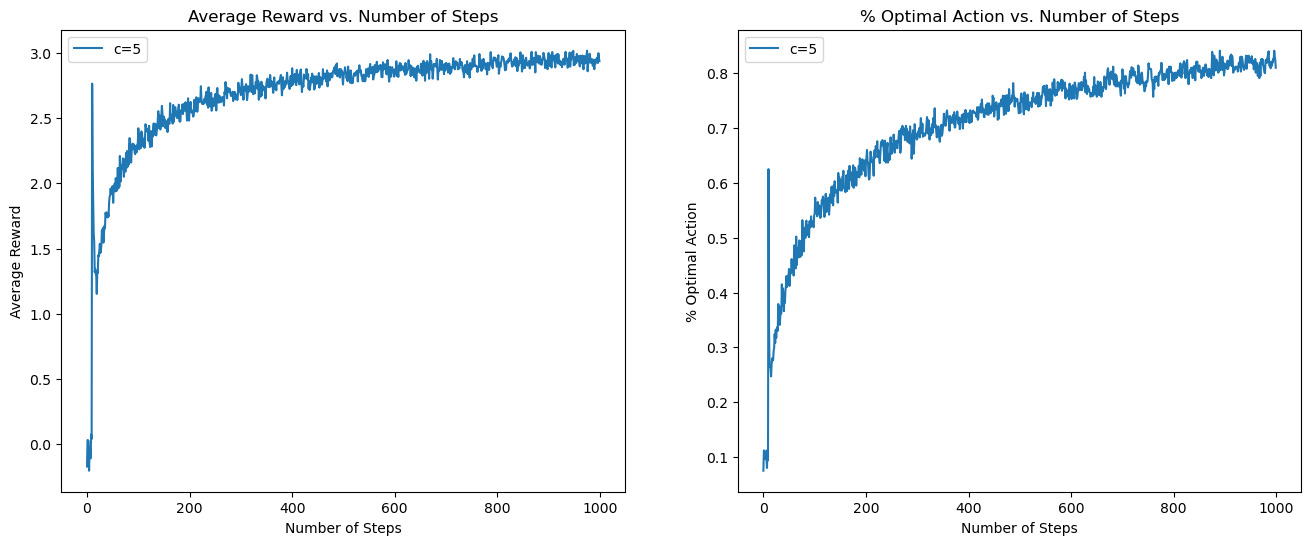

In [9]:
k= 10
nbr_runs = 1000
nbr_steps = 1000 
C = [0, 0.1, 0.5, 1.5, 3, 5]
for c in C: 
    bandit(k, nbr_runs, nbr_steps, c)

Interpretation: 
- The parameter c (which is a constant) controls the degree of exploration, the higher chance is given to exploration. 
- UCB generally performs better than epsilon-greedy selection method, execpt for the first k steps. 
- We can also notice that all the algorithms finally converge to similar optimal values, and that's because no matter how much exploration as long as the model finds the optimal arm it will eventually continue to choose it. and the final average is going to be mostly the approximation of the true value of that optimal arm. 